# Lab 2: Exploratory Data Analysis (Python, Pandas & matplotlib)

In this lab 2, we are going to learn how to explore data using Python. Namely, we will work with Pandas and matplotlib, for data filtering and grouping, and visualization respectively. Provided VM is recommeded for this lab.

## Setup

#### This Notebook

Download this notebook so you can edit it. (If you are viewing it via nbviewer.ipython.org, then use the link in the upper right corner.) To edit this notebook, in your VM terminal, type "ipython notebook" and in your prompted brower, click the notebook file to open and edit it.

#### Data

We'll use the sampled data from the log file in lab 1, download the file 'wc_day6_1_sample.csv' [here](https://ufl.instructure.com/courses/344204/files/folder/Labs/Lab%202) and put it in your VM (To enable the 'Drag'n Drop' for ease of transfering files to/from VM, go to Device -> Drag 'n Drop -> Bidirectional)

## Pandas

The two main data structures used by pandas are

 * Series: one-dimensional collections of any data type.
 * DataFrames: two-dimensional data structures similar to a database table.

At first, we need to import the libraries we need. In the code cell below, we will import two libraries, pandas for data processing and PyLab for plotting.

To run the code in the cell below, select the cell, then press 'ctrl + enter', or hit the 'play' button above.

In [1]:
import pylab
import pandas as pd

## The Basics

To create our first DataFrame using pandas, run:

In [2]:
df = pd.DataFrame( { 'a' : [1, 2, 3, 4], 'b': [ 'w', 'x', 'y', 'z'] })

This is going to create a table with two columns and four rows, we can inspect the DataFrame by typing the name on the object:

In [3]:
df

,a,b
0,1,w
1,2,x
2,3,y
3,4,z


For more detailed information about the schema of a DataFrame we can use the info function:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
a    4 non-null int64
b    4 non-null object
dtypes: int64(1), object(1)
memory usage: 136.0+ bytes


To check the first few rows we can use head and the last few rows tail functions

In [5]:
df.head(2)

,a,b
0,1,w
1,2,x


df.tail(2)

To access any range of rows in the DataFrame we can use array-like indexes, for example, the following will retrieve rows 1 and 2 from our DataFrame:

In [6]:
df[1:3]

,a,b
1,2,x
2,3,y


For the following exercises we will use the dataset mentioned in setup.

After you download this CSV file, we can import it into a DataFrame, assuming the file is in the path /home/datascience/

In [8]:
log_df = pd.read_csv("/home/datascience/labs/notebooks/wc_day6_1_sample.csv",
                     names=['ClientID', 'Date', 'Time', 'URL', 'ResponseCode', 'Size'],
                     na_values=['-'])

Using read_csv function, we created a new DataFrame with column names passed as a list in the names parameter and null or non existing values represented with "-" in the na_values parameter.

## More complex operations

#### Row filtering

To create row filters, we use lists of Boolean values that evaluate a condition:

In [9]:
is_may1st = log_df['Date'] == '01/May/1998'

This returns a list of True/False values for each row in **log_df** that evaluate the given condition. To filter using this list:

In [10]:
may1_df = log_df[is_may1st]

This can be done more concisely:

In [11]:
may1_df = log_df[log_df['Date'] == '01/May/1998']

#### Column filtering

For column filters, we use the name of the columns that we want to keep passes as a string array:

In [12]:
url_codes = log_df[['URL', 'ResponseCode']]

#### Grouping

For grouping by a column, i.e. dividing all the rows into groups of the same value in that column, we use **groupby** which does not return a DataFrame but a **DataFrameGroupBy** object. The **DataFrameGroupBy** object is a dictionary-like object where keys are the distinct values in the grouping column, and values are DataFrames containnig th remaining columns

In [13]:
grouped = log_df.groupby('ResponseCode')

In [14]:
grouped.get_group(200)

,ClientID,Date,Time,URL,ResponseCode,Size
0,1044,30/Apr/1998,22:46:12,/images/11104.gif,200.0,508.0
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200.0,169.0
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200.0,7027.0
5,13649,01/May/1998,14:55:01,/images/hm_anime_e.gif,200.0,15609.0
6,15006,01/May/1998,16:14:32,/english/images/comp_bu_group_off.gif,200.0,1557.0
7,16366,01/May/1998,17:14:13,/images/arw_lk.gif,200.0,669.0
8,16877,01/May/1998,17:46:37,/images/32p49807.jpg,200.0,13856.0
9,17165,01/May/1998,17:58:46,/images/home_fr_button.gif,200.0,2140.0
10,17251,01/May/1998,18:06:07,/images/s102438.gif,200.0,297.0
11,1734,01/May/1998,12:57:32,/english/venues/cities/images/paris/21hundred.gif,200.0,318.0


In [15]:
# group by multiple columns
multi_grouped = log_df.groupby(['ResponseCode', 'Date'])

Similarly, we can apply operations to each group such as:

In [16]:
multi_grouped.get_group((200, '30/Apr/1998')).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14577 entries, 0 to 199994
Data columns (total 6 columns):
ClientID        14577 non-null int64
Date            14577 non-null object
Time            14577 non-null object
URL             14577 non-null object
ResponseCode    14577 non-null float64
Size            14577 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 797.2+ KB


In [17]:
grouped.size()
# returns a panda Series(1-d array with the groupby value(s)as index, count of each group as data values.)

ResponseCode
200.0    173924
206.0       379
302.0        14
304.0     25457
400.0         3
404.0       215
500.0         5
dtype: int64

In [18]:
grouped.sum(), grouped.mean(), grouped.median()

(                ClientID          Size
 ResponseCode                          
 200.0         1747413714  1.468218e+09
 206.0            3943763  3.399102e+07
 302.0             160809  3.334000e+03
 304.0          228519101  1.994370e+05
 400.0              14153  4.080000e+02
 404.0            1777150  5.784000e+04
 500.0              51037  1.525000e+03,
                   ClientID          Size
 ResponseCode                            
 200.0         10046.995895   8441.722091
 206.0         10405.707124  89686.058047
 302.0         11486.357143    238.142857
 304.0          8976.670503     11.878320
 400.0          4717.666667    136.000000
 404.0          8265.813953    269.023256
 500.0         10207.400000    305.000000,
               ClientID     Size
 ResponseCode                   
 200.0          10081.0    937.0
 206.0          10274.0  10200.0
 302.0           9865.5    218.0
 304.0           8349.0      0.0
 400.0            781.0    147.0
 404.0           7116.0    20

## Basic Statistics

Pandas can also provide useful insights of numerical columns in a DataFrame. The function describe will provide basic statistics such as count, mean, standard deviation, etc.

In [19]:
log_df.describe()

,ClientID,ResponseCode,Size
count,200000.000000,199997.000000,1.913330e+05
mean,9909.549500,213.486152,7.852653e+03
std,6363.720798,35.259744,7.960852e+04
min,0.000000,200.000000,0.000000e+00
25%,4326.000000,200.000000,2.310000e+02
50%,9812.000000,200.000000,9.140000e+02
75%,15056.000000,200.000000,2.557000e+03
max,34794.000000,500.000000,2.891887e+06


## Visualization

Now lets visualize our data using PyLab (this step requires to have matplotlib installed, already installed in the virtual machine)

#### Pie Chart

In [20]:
# The sizes of each group by ResponseCode
grouped.size()

ResponseCode
200.0    173924
206.0       379
302.0        14
304.0     25457
400.0         3
404.0       215
500.0         5
dtype: int64

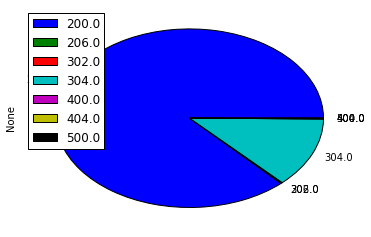

In [21]:
%matplotlib inline
# show the percentage of each response code
import matplotlib.pyplot as plt
grouped.size().plot(kind='pie', legend=True)

#### Bar Chart

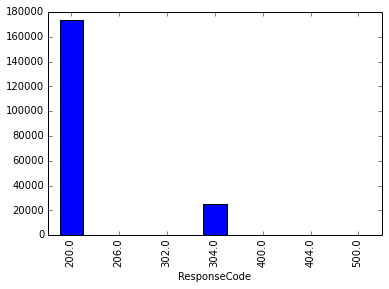

In [22]:
# Or show as bar chart
grouped.size().plot(kind='bar')

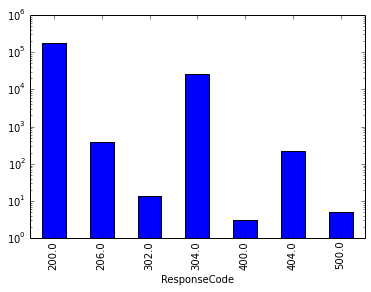

In [23]:
# Since the diferences between the counts are huge, use logy y-axis
ax = grouped.size().plot(kind='bar')
ax.set_yscale('log', nonposy='clip')# the 'noposy='clip'' is to replace the invalid log(0) with a very small positive one
                                  # while doing the log-scale transition.

Now let's check how requests changes during different hour of the day on '01/May/1998'

#### Line Plot

In [34]:
may1_df = log_df[log_df['Date'] == '01/May/1998']
may1_df.loc[:,('DateTime')] = pd.to_datetime(may1_df.apply(lambda row: row['Date'] + ' ' + row['Time'], axis=1))
hour_grouped = may1_df.groupby(lambda x: may1_df['DateTime'][x].hour)

In [38]:
# Let's check how many requests were made during each hour of the day on '01/May/1998' 
hour_grouped.size()

0      6569
1      6103
2      6072
3      6625
4      6019
5      4733
6      4995
7      5094
8      6460
9      7892
10     7465
11     7893
12    10127
13    10225
14    12040
15    12256
16    13367
17    11494
18    11515
19    10386
20     9363
21     6610
dtype: int64

In [39]:
# and how much traffic the server handled during each hour:
hour_grouped['Size'].sum()

0     44166352.0
1     46857868.0
2     42803283.0
3     38868040.0
4     49190470.0
5     34184105.0
6     47877742.0
7     37838488.0
8     57224306.0
9     67645841.0
10    64193518.0
11    59961757.0
12    79150391.0
13    80907946.0
14    98825640.0
15    94044070.0
16    73413868.0
17    94389754.0
18    79264404.0
19    76209823.0
20    67784666.0
21    59834046.0
Name: Size, dtype: float64

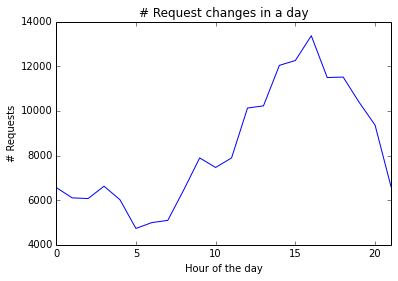

In [40]:
# plot the changes of traffic on different hours of the day.
ax = hour_grouped.size().plot()
ax.set_ylabel("# Requests")
ax.set_xlabel("Hour of the day")
ax.set_title("# Request changes in a day")

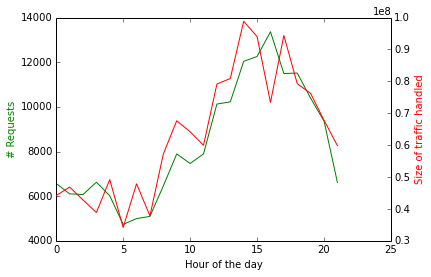

In [42]:
# Let's show the # requests and size of traffic in a single graph:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = hour_grouped.size().index

ax1.plot(x, hour_grouped.size(), 'g-')
ax2.plot(x, hour_grouped['Size'].sum(), 'r-')

ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('# Requests', color='g')
ax2.set_ylabel('Size of traffic handled', color='r')

## Now it's your turn:

### Homework 2

NOTE: You don't have to submit anything for this homework.

Questions:
1. How many requests that were sent on '30/Apr/1998' and had HTTP return code 404?
2. Generate a plot of the number of **distinct** users of the site every hour on 01/May/1998 using bar chart.
3. Generate a line plot of the number of **distinct** users vs  size of traffic of the site every hour on 01/May/1998, is there any correlation? (hint: use "hour_grouped['ClientID'].nunique()" to get the number of distinct users)
5. We wish to see if there is any correlation between client-ids and hours of the day at which they visit the website. Get 100 client ids from the dataset and generate a scatter plot that shows the hours of the day these clients sent requests. Hint: df.plot(kind='scatter', x='a', y='b'); and df['Column'].unique()
6. The log file used in the lab was from one day of the WorldCup. Lets apply our analysis to Jul/24 and Jul/25 in the [log(wc_day91_1.log.tar.bz2)](https://ufl.instructure.com/courses/344204/files/folder/Labs/Lab%202). Repeat exercises 3 and 4 with it. How similar or different are the results? Hint: You can use UNIX command line tools from Lab 1 to first get a csv file and then load it into Pandas.
